In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import tensorflow as tf
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
from sklearn.model_selection import train_test_split
torch.manual_seed(0)
rd.seed(42)

In [180]:
inputs1 = torch.randn((48,2),requires_grad=True)
scalar1 = torch.Tensor([3.0,3.0])
# print(inputs1)
inputs1 = torch.sub(inputs1,scalar1)

inputs2 = torch.randn((52,2),requires_grad=True)
scalar2 = torch.Tensor([-3.0,-3.0])
inputs2 = torch.sub(inputs2,scalar2)
# print(inputs2)
inputs3 = torch.randn((51,2),requires_grad=True)
scalar3 = torch.Tensor([-3.0,3.0])
inputs3 = torch.sub(inputs3,scalar3)
# print(inputs3)3
inputs4 = torch.randn((49,2),requires_grad=True)
scalar4 = torch.Tensor([3.0,-3.0])
inputs4 = torch.sub(inputs4,scalar4)
# print(inputs4)
inputs = torch.cat((inputs1,inputs2,inputs3,inputs4),0)
# print(inputs)
targets = torch.Tensor()
for i,inp in enumerate(inputs):
    if (inp[0]<0):
        if (inp[1]<0):
            t = torch.Tensor([1.0])
            targets = torch.cat((t,targets),0)
        else:
            t = torch.Tensor([0.0])
            targets = torch.cat((t,targets),0)
    else:
        if (inp[1]<0):
            t = torch.Tensor([0.0])
            targets = torch.cat((t,targets),0)
        else:
            t = torch.Tensor([1.0])
            targets = torch.cat((t,targets),0)
# print(targets)
# inputs1, test_inputs, targets1, test_targets = train_test_split(inputs, targets, test_size = 0.5)

In [25]:
inputs1 = torch.randn((48,2))
scalar1 = torch.Tensor([3.0,3.0])
# print(inputs1)
inputs1 = torch.sub(inputs1,scalar1)

inputs2 = torch.randn((52,2))
scalar2 = torch.Tensor([-3.0,-3.0])
inputs2 = torch.sub(inputs2,scalar2)
# print(inputs2)
inputs3 = torch.randn((51,2))
scalar3 = torch.Tensor([-3.0,3.0])
inputs3 = torch.sub(inputs3,scalar3)
# print(inputs3)3
inputs4 = torch.randn((49,2))
scalar4 = torch.Tensor([3.0,-3.0])
inputs4 = torch.sub(inputs4,scalar4)
# print(inputs4)
test_inputs = torch.cat((inputs1,inputs2,inputs3,inputs4),0)
# print(inputs)
test_targets = torch.Tensor()
for i,inp in enumerate(inputs):
    if (inp[0]<0):
        if (inp[1]<0):
            t = torch.Tensor([1.0])
            test_targets = torch.cat((t,test_targets),0)
        else:
            t = torch.Tensor([0.0])
            test_targets = torch.cat((t,test_targets),0)
    else:
        if (inp[1]<0):
            t = torch.Tensor([0.0])
            test_targets = torch.cat((t,test_targets),0)
        else:
            t = torch.Tensor([1.0])
            test_targets = torch.cat((t,test_targets),0)
# print(targets)

MLP

In [135]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(2, 7),
      nn.ReLU(),
      nn.Linear(7, 8),
      nn.ReLU(),
      nn.Linear(8, 1)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  
model1 = MLP()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.1)

for epoch in range(100):
    # Forward pass
    outputs = model1(inputs)
    
    # Compute the loss
    loss = criterion(outputs, targets.view(-1,1))
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    # Update the weights
    optimizer.step()
    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.6699965000152588
Epoch 10, Loss: 0.5423604846000671
Epoch 20, Loss: 0.4110138714313507
Epoch 30, Loss: 0.29256582260131836
Epoch 40, Loss: 0.212053582072258
Epoch 50, Loss: 0.16007456183433533
Epoch 60, Loss: 0.1251581609249115
Epoch 70, Loss: 0.102327860891819
Epoch 80, Loss: 0.08768481016159058
Epoch 90, Loss: 0.07806747406721115


In [184]:
outputs = model1(test_inputs)
correct = 0 
for i, input in enumerate(outputs):
    if outputs[i]<0.5 and test_targets[i]==0:
        correct+=1
    elif outputs[i]>=0.5 and test_targets[i]==1:
        correct+=1
print('Test Accuracy of the model on the 200: {} %'.format(100 * correct / 200))

Test Accuracy of the model on the 200: 99.5 %


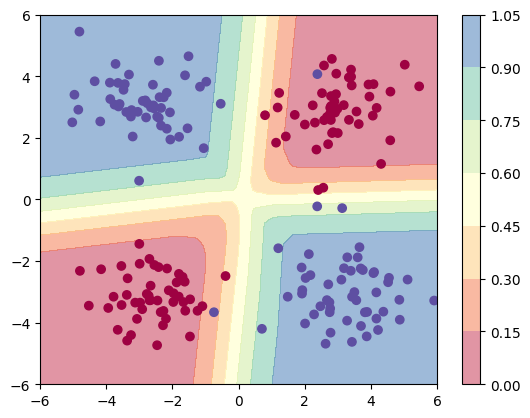

In [137]:
# Predict with the model


def predict_plot_grid(model):
    XX, YY = torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1)
    logits = model(X_grid)
    probs = torch.sigmoid(logits).reshape(100, 100)
    plt.contourf(XX, YY, probs.detach().numpy(), 
                 cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()
    
    plt.scatter(inputs[:, 0].detach().numpy(), inputs[:, 1].detach().numpy(),c=targets, cmap=plt.cm.Spectral)
    
predict_plot_grid(model1)

MLP with L1

In [138]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(2, 7),
      nn.ReLU(),
      nn.Linear(7, 8),
      nn.ReLU(),
      nn.Linear(8, 1)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  
model2 = MLP()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.1)

for epoch in range(100):
    # Forward pass
    outputs = model2(inputs)
    
    # Compute the loss
    loss = criterion(outputs, targets.view(-1,1))
    
    # Zero the gradients
    optimizer.zero_grad()
    l1_coeff = 0.01
    l1_reg  = 0
    for parameter in model2.parameters():
        l1_reg +=  parameter.norm(1)
    # Backward pass
    loss += l1_coeff * l1_reg
    loss.backward()
    # Update the weights
    optimizer.step()
    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.9011722207069397
Epoch 10, Loss: 0.8171834945678711
Epoch 20, Loss: 0.7609930634498596
Epoch 30, Loss: 0.6924639344215393
Epoch 40, Loss: 0.6171163320541382
Epoch 50, Loss: 0.5449932813644409
Epoch 60, Loss: 0.4824725389480591
Epoch 70, Loss: 0.43514949083328247
Epoch 80, Loss: 0.40114861726760864
Epoch 90, Loss: 0.38005775213241577


In [183]:
outputs = model2(test_inputs)
correct = 0 

# outputs = F.softmax(model1(inputs), dim=-1).detach().numpy()
for i, input in enumerate(outputs):
    if outputs[i]<0.5 and test_targets[i]==0:
        correct+=1
    elif outputs[i]>=0.5 and test_targets[i]==1:
        correct+=1
print('Test Accuracy of the model on the 200 test: {} %'.format(100 * correct / 200))

Test Accuracy of the model on the 200 test: 98.5 %


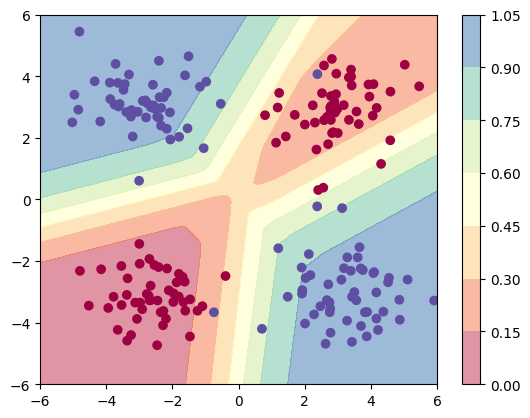

In [140]:
# Predict with the model
    
predict_plot_grid(model2)

MLP with L2

In [141]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(2, 15),
      nn.ReLU(),
      nn.Linear(15, 10),
      nn.ReLU(),
      nn.Linear(10, 1)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  
model3 = MLP()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model3.parameters(), lr=0.1)

for epoch in range(100):
    # Forward pass
    outputs = model3(inputs)
    
    # Compute the loss
    loss = criterion(outputs, targets.view(-1,1))
    
    # Zero the gradients
    optimizer.zero_grad()
    l2_coeff = 0.1
    l2_reg  = 0
    for parameter in model3.parameters():
        l2_reg +=  parameter.norm(2)
    # Backward pass
    loss += l2_coeff * l2_reg
    loss.backward()
    # Update the weights
    optimizer.step()
    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1.3566205501556396
Epoch 10, Loss: 1.16715407371521
Epoch 20, Loss: 1.046345829963684
Epoch 30, Loss: 0.9381186366081238
Epoch 40, Loss: 0.8608333468437195
Epoch 50, Loss: 0.8141577839851379
Epoch 60, Loss: 0.7845508456230164
Epoch 70, Loss: 0.7631182074546814
Epoch 80, Loss: 0.7441970705986023
Epoch 90, Loss: 0.7297298312187195


In [182]:
outputs = model3(test_inputs)
correct = 0 
for i, input in enumerate(outputs):
    if outputs[i]<0.5 and test_targets[i]==0:
        correct+=1
    elif outputs[i]>=0.5 and test_targets[i]==1:
        correct+=1
print('Test Accuracy of the model on the 200: {} %'.format(100 * correct / 200))

Test Accuracy of the model on the 200: 99.5 %


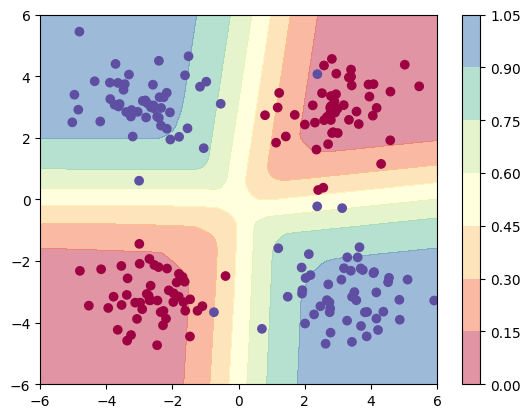

In [143]:
# Predict with the model
    
predict_plot_grid(model3)

In [170]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        logits = self.linear(x)
        return logits
    
log_reg = LogisticRegression(2)

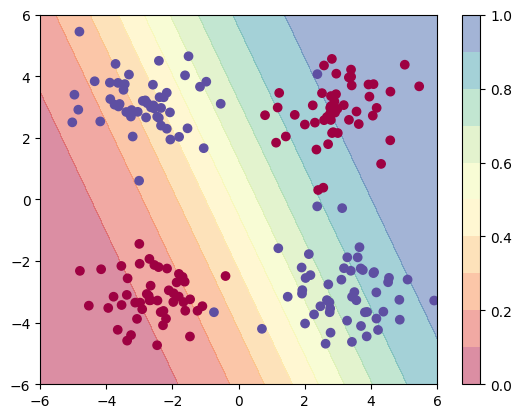

In [171]:
# Predict with the model


def predict_plot_grid(model):
    XX, YY = torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1)
    logits = model(X_grid)
    probs = torch.sigmoid(logits).reshape(100, 100)
    plt.contourf(XX, YY, probs.detach().numpy(), levels=[0.0, 0.1, 0.2,0.3, 0.4,0.5, 0.6,0.7, 0.8,0.9, 1.0], 
                 cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()
    
    plt.scatter(inputs[:, 0].detach().numpy(), inputs[:, 1].detach().numpy(),c=targets, cmap=plt.cm.Spectral)
    
predict_plot_grid(log_reg)

0 0.7521669864654541
converged


/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_45412/1795841540.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(inputs, dtype=torch.float32)
/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_45412/1795841540.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(targets)


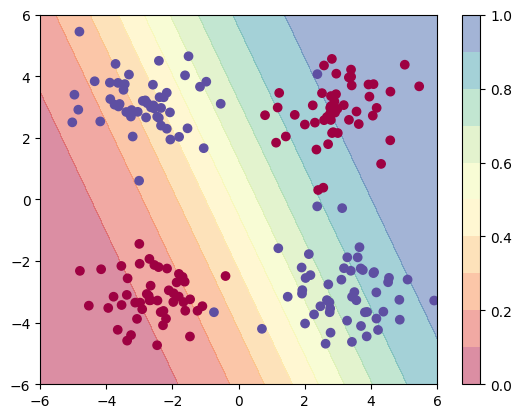

In [172]:
opt = torch.optim.Adam(log_reg.parameters(), lr=0.1)
# log_reg = LogisticRegression(2)
# inputs = inputs.detach().numpy()
# inputs = np.concatenate([inputs, inputs[:,[0]]*inputs[:,[1]], inputs[:, [0]]**2, inputs[:, [1]]**2], axis=-1)

def sigmoid(x):
    return 1/(1+np.exp(-x))

X_tensor = torch.tensor(inputs, dtype=torch.float32)

# print(X_tensor.shape)

log_reg5= LogisticRegression(2)


opt = torch.optim.Adam(log_reg.parameters(), lr=0.1)

converged = False

targets = torch.tensor(targets)

targets = targets.type(torch.LongTensor)

prev_loss = 1e8

F = nn.CrossEntropyLoss()

i = 0
while not converged:
    opt.zero_grad()
    logits = log_reg(X_tensor)
    # print(targets)
    logits = logits.detach().numpy()
    prob = sigmoid(logits)
    other_prob = 1 - prob
    p = np.hstack((prob, other_prob))
    p = torch.tensor(p, requires_grad=True)
    loss = F(p, targets)
    # loss = nn.BCEWithLogitsLoss()(logits, torch.tensor(targets, dtype=torch.float32).view(-1, 1))
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True 
        print("converged")
    prev_loss = loss.item() 
    i = i + 1



predict_plot_grid(log_reg)

In [173]:
# 
log_reg5 = LogisticRegression(5)

In [191]:
# inputs = inputs.detach().numpy()
# inputs = np.concatenate([inputs, inputs[:,[0]]*inputs[:,[1]], inputs[:, [0]]**2, inputs[:, [1]]**2], axis=-1)

def sigmoid(x):
    return 1/(1+np.exp(-x))

X_tensor = torch.tensor(inputs, dtype=torch.float32)

# print(X_tensor.shape)

log_reg5= LogisticRegression(2)


opt = torch.optim.Adam(log_reg.parameters(), lr=0.1)

converged = False

targets = torch.tensor(targets)

targets = targets.type(torch.LongTensor)

prev_loss = 1e8

F = nn.CrossEntropyLoss()

i = 0
while not converged:
    opt.zero_grad()
    logits = log_reg(X_tensor)
    # print(targets)
    logits = logits.detach().numpy()
    prob = sigmoid(logits)
    other_prob = 1 - prob
    p = np.hstack((prob, other_prob))
    p = torch.tensor(p, requires_grad=True)
    loss = F(p, targets)
    loss.backward()
    opt.step()
    if i%10==0:
        print(i, loss.item())
    if np.abs(prev_loss - loss.item()) < 1e-5:
        converged = True 
        print("converged")
    prev_loss = loss.item() 
    i = i + 1

0 0.6506845355033875
converged


/var/folders/12/01l675nx0518lj79hbl9rkp80000gn/T/ipykernel_45412/2062671737.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets = torch.tensor(targets)


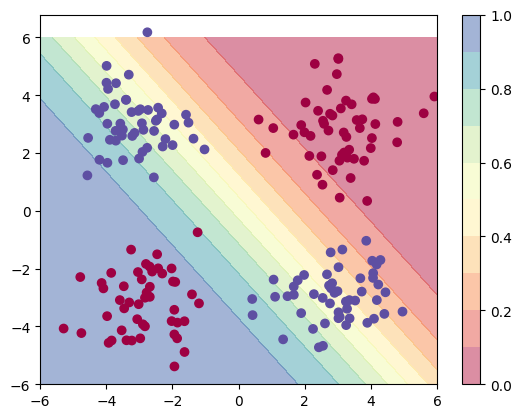

In [196]:
# Predict with the model


def predict_plot_grid(model):
    XX, YY = torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100))
    X_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1)
    logits = model(X_grid)
    probs = torch.sigmoid(logits).reshape(100, 100)
    plt.contourf(XX, YY, probs.detach().numpy(), levels=[0.0, 0.1, 0.2,0.3, 0.4,0.5, 0.6,0.7, 0.8,0.9, 1.0], 
                 cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()
    
    plt.scatter(inputs[:, 0], inputs[:, 1],c=targets, cmap=plt.cm.Spectral)
    
predict_plot_grid(log_reg5)